In [62]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
import squarify    # pip install squarify (algorithm for treemap)
#from mpl_toolkits.basemap import Basemap
import folium
import json

import pandas as pd
import shapefile as shp
import descartes
from shapely.geometry import Point, Polygon
import fiona
import shapely
%matplotlib inline

In [41]:
weather = open('weather.json')
data = json.load(weather)
stations = data['metadata']['stations']
temperature = data['items'][0]['readings']
stations

[{'id': 'S109',
  'device_id': 'S109',
  'name': 'Ang Mo Kio Avenue 5',
  'location': {'latitude': 1.3764, 'longitude': 103.8492}},
 {'id': 'S50',
  'device_id': 'S50',
  'name': 'Clementi Road',
  'location': {'latitude': 1.3337, 'longitude': 103.7768}},
 {'id': 'S107',
  'device_id': 'S107',
  'name': 'East Coast Parkway',
  'location': {'latitude': 1.3135, 'longitude': 103.9625}},
 {'id': 'S43',
  'device_id': 'S43',
  'name': 'Kim Chuan Road',
  'location': {'latitude': 1.3399, 'longitude': 103.8878}},
 {'id': 'S108',
  'device_id': 'S108',
  'name': 'Marina Gardens Drive',
  'location': {'latitude': 1.2799, 'longitude': 103.8703}},
 {'id': 'S44',
  'device_id': 'S44',
  'name': 'Nanyang Avenue',
  'location': {'latitude': 1.34583, 'longitude': 103.68166}},
 {'id': 'S121',
  'device_id': 'S121',
  'name': 'Old Choa Chu Kang Road',
  'location': {'latitude': 1.37288, 'longitude': 103.72244}},
 {'id': 'S106',
  'device_id': 'S106',
  'name': 'Pulau Ubin',
  'location': {'latitude': 1

In [59]:
temperature_list = []
latitude_list = []
longtitude_list = []

for i in range(len(stations)):
    temp = temperature[i]['value']
    loc = list(stations[i]['location'].values())
    #print({'temperature': temp, 'latitude': loc[0], 'longtitude': loc[1]})
    #df.append({'temperature': temp, 'latitude': loc[0], 'longtitude': loc[1]}, ignore_index = True)
    temperature_list.append(temp)
    latitude_list.append(loc[0])
    longtitude_list.append(loc[1])
    
data = {'temperature': temperature_list, 'lat': latitude_list, 'lon': longtitude_list}   
df = pd.DataFrame(data)
df

,temperature,lat,lon
0,26.0,1.37640,103.84920
1,25.5,1.33370,103.77680
2,27.1,1.31350,103.96250
3,26.6,1.33990,103.88780
4,26.6,1.27990,103.87030
5,25.5,1.34583,103.68166
6,25.5,1.37288,103.72244
7,24.9,1.41680,103.96730
8,25.9,1.31055,103.83650
9,26.4,1.29377,103.61843


In [66]:
temp = [Point(xy) for xy in zip( df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}
df = gpd.GeoDataFrame(df, crs = crs, geometry = temp)

C:\Users\alvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

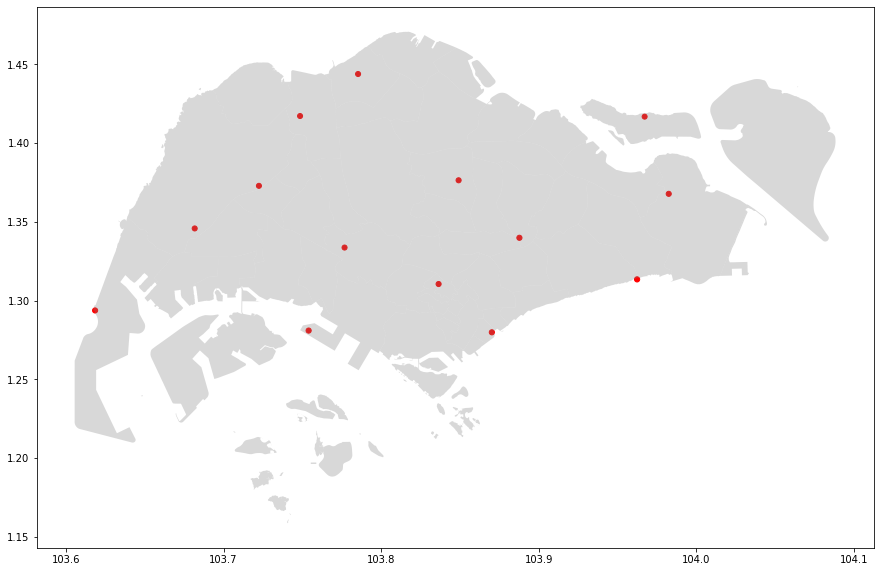

In [72]:
singapore_map = gpd.read_file('Planning Area Census/Planning_Area_Census2010.shp')
singapore_map = singapore_map.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize = (15,15))
df.plot(ax = ax, markersize = 'temperature', color = "red", marker = "o")
singapore_map.plot(ax = ax, alpha = 0.3, color = "grey")

In [73]:
df.to_file('weather.shp')